<a href="https://colab.research.google.com/github/IanPol0/DataScienceNetflix/blob/main/DataScienceNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LAS FUNCIONES EN CAMELCASE Y LAS VARIABLES EN SNAKECASE Y RESPETENLO
##Los subtitulos en '##', Los ejercicios en '###'

#Trabajo Práctico Netflix
Septiembre 2022

##Import

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

In [2]:
url='https://raw.githubusercontent.com/IanPol0/DataScienceNetflix/main/NetflixHistory.csv'
history = pd.read_csv(url)

##Delete devices not required

In [3]:
devices_remove = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 
'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 
'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

#delete devices not required
for device in devices_remove:
  #print(len(history), device)
  history = history.drop(history.index[history['Device Type'] == device], inplace=False)
  history = history.reset_index(drop=True)

##Adapt time

In [4]:
#returns hours, minutes and seconds in seconds
def toSeconds(time_str):
  h, m, s = time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

##Divide series and movies

In [20]:
identificator = []

for i in range(len(history['Title'])):
  if history['Title'][i].__contains__('Temporada'):
    identificator.append('serie')
  elif history['Title'][i].__contains__('Capítulo'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Season'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Clip'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Resumen'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Tráiler'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Series'): 
    identificator.append('serie')
  else:
    identificator.append('movie')

history['Type'] = identificator

In [21]:
series = history[history['Type'] == 'serie']
movies = history[history['Type'] == 'movie']
del history['Type'], series['Type'], movies['Type']

In [22]:
movies

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
89,89,Chona,2022-07-16 22:28:48,01:40:03,NaN,Mr. Holmes,NaN,Apple Apple TV 4 Apple TV,01:39:52,01:39:52,AR (Argentina)
135,135,Chona,2022-05-01 00:14:32,00:00:21,Autoplayed: user action: None;,Shutter Island_hook_primary_16x9,HOOK,Apple Apple TV 4 Apple TV,00:00:22,00:00:22,AR (Argentina)
138,138,Chona,2022-05-01 00:12:46,00:00:26,Autoplayed: user action: None;,Drive_hook_06_16x9,HOOK,Apple Apple TV 4 Apple TV,00:00:26,00:00:26,AR (Argentina)
145,145,Chona,2022-04-17 02:08:02,00:00:06,Autoplayed: user action: None;,Fast & Furious Presents: Hobbs & Shaw_hook_01_...,HOOK,Apple Apple TV 4 Apple TV,00:00:07,00:00:07,AR (Argentina)
157,157,Chona,2022-03-29 01:35:31,00:38:51,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:49:05,01:49:05,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
6162,12868,Chona,2015-01-20 00:49:39,01:29:21,NaN,Flubber y el profesor chiflado,NaN,Apple TV 3 (revised),01:29:21,01:29:21,AR (Argentina)
6163,12869,Chona,2015-01-20 00:20:46,00:00:32,NaN,Toy Story: una historia de terror,NaN,Apple TV 3 (revised),00:21:39,00:21:39,AR (Argentina)
6188,12894,Chona,2015-01-16 00:48:04,01:34:02,NaN,Pesos pesados,NaN,Apple TV 3 (revised),01:34:01,01:34:01,AR (Argentina)
6189,12895,Chona,2015-01-16 00:30:53,00:00:01,NaN,Pesos pesados,NaN,Apple TV 3 (revised),00:00:01,Not latest view,AR (Argentina)


##Exercises

###a) Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [23]:
devices_compare = {}

for dev in history['Device Type']:
  if dev not in devices_compare:
    devices_compare[dev] = 1
  else:
    devices_compare[dev] += 1

max(devices_compare, key=devices_compare.get)

'Apple Apple TV 4 Apple TV'

###b) Encontrar la película con más ocurrencias y la película con mayor duración total.

In [24]:
movies_compare = {}

for mov in movies['Title']:
  if mov not in movies_compare:
    movies_compare[mov] = 1
  else:
    movies_compare[mov] += 1

max(movies_compare, key=movies_compare.get)
#movies_compare

'Star Wars: El Imperio contraataca'

In [25]:
movies_duration = {}

for mov in movies.index:
  if movies['Title'][mov] not in movies_duration:
    movies_duration[movies['Title'][mov]] = toSeconds(movies['Duration'][mov])
  else:
    movies_duration[movies['Title'][mov]] += toSeconds(movies['Duration'][mov])

max(movies_duration, key=movies_duration.get)
#movies_duration

'Star Wars: El Imperio contraataca'

###c) Generar un TOP “N” de series vistas y graficar.

####i) Por tiempo visto.

In [26]:
series_duration = {}
name = ''

for ser in series.index:
  name = (series['Title'][ser].split(':'))[0]
  if name not in series_duration:
    series_duration[name] = toSeconds(series['Duration'][ser])
  else:
    series_duration[name] += toSeconds(series['Duration'][ser])

max(series_duration, key=series_duration.get)

'Cómo conocí a tu madre'

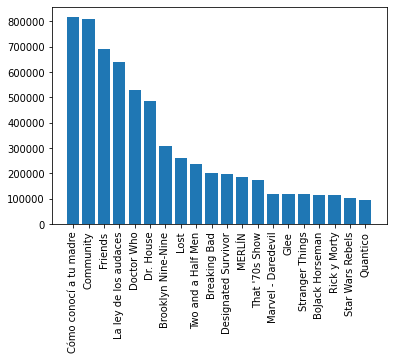

In [27]:
temp, final = {}, {}
temp = series_duration
for i in range(20):
  final[max(temp, key=temp.get)] = temp[max(temp, key=temp.get)]
  temp[max(temp, key=temp.get)] = 0
plt.bar(final.keys(), final.values())
plt.xticks(rotation = 90)
plt.show()

####ii) Por ocurrencias.

In [28]:
series_occurences = {}
name = ''

for ser in series.index:
  name = (series['Title'][ser].split(':'))[0]
  if name not in series_occurences:
    series_occurences[name] = 1
  else:
    series_occurences[name] += 1

max(series_occurences, key=series_occurences.get)

'Community'

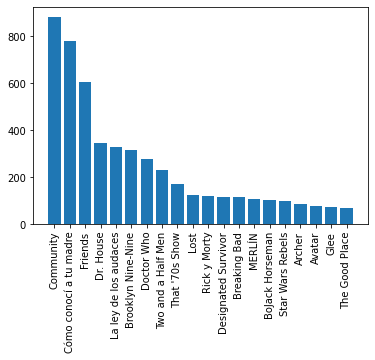

In [29]:
temp2, final2 = {}, {}
temp2 = series_occurences
for i in range(20):
  final2[max(temp2, key=temp2.get)] = temp2[max(temp2, key=temp2.get)]
  temp2[max(temp2, key=temp2.get)] = 0
plt.bar(final2.keys(), final2.values())
plt.xticks(rotation = 90)
plt.show()

###d) Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

In [63]:
day = history['Start Time'][0]
day = (day.split('-'))[0]+ '-' +(day.split('-'))[1]+ '-' +((day.split('-'))[2]).split()[0]
day = datetime.strptime(day, "%Y-%m-%d")

#dt = datetime.now(day)
x = day.weekday()
x

6

###e) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

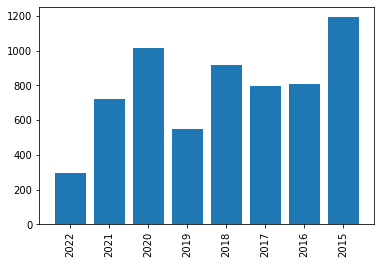

In [36]:
titulos_anios = {}
anio = ''

for title in history.index:
  anio = (history['Start Time'][title].split('-'))[0]
  if anio not in titulos_anios:
    titulos_anios[anio] = 1
  else:
    titulos_anios[anio] += 1

plt.bar(titulos_anios.keys(), titulos_anios.values())
plt.xticks(rotation = 90)
plt.show()

###f) Total de días de todos los títulos reproducidos.

In [45]:
total_days = []
day = ''

for day in history['Start Time']:
  day = (day.split('-'))[0]+ '/' +(day.split('-'))[1]+ '/' +((day.split('-'))[2]).split()[0]
  if day not in total_days:
    total_days.append(day)

len(total_days)

928

##Bonus

###1. Identificar cuál fue la película de Star Wars más veces vista por duración.

In [46]:
StarWars_duration = {}
name = ''

for mov in movies.index:
  name = (movies['Title'][mov].split(':'))[0]
  if name == 'Star Wars':
    if movies['Title'][mov] not in StarWars_duration:
      StarWars_duration[movies['Title'][mov]] = toSeconds(movies['Duration'][mov])
    else:
      StarWars_duration[movies['Title'][mov]] += toSeconds(movies['Duration'][mov])

max(StarWars_duration, key=StarWars_duration.get)

'Star Wars: El Imperio contraataca'